## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [1]:
! git clone https://github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 56 (delta 20), reused 17 (delta 11), pack-reused 23 (from 1)
Receiving objects: 100% (56/56), 12.94 MiB | 11.94 MiB/s, done.
Resolving deltas: 100% (21/21), done.


**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [5]:
# 1. Load the ./data/USA_cars_datasets.csv. Keep the following variables and drop the rest: price, year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.
import pandas as pd
import numpy as np
df = pd.read_csv('./knn/data/USA_cars_datasets.csv')
df = df[['price', 'year', 'mileage']]
print(df.isnull().sum())
print(df.head())
print(df.shape)
df.describe()


price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [6]:
#2. Maxmin normalize year and mileage.

for column in ['year', 'mileage']:
  df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [7]:
#3. Split the sample into ~80% for training and ~20% for evaluation.
from sklearn.model_selection import train_test_split

X = df[['year', 'mileage']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


k=3, Sum of Squared Error: 63223286609.11111


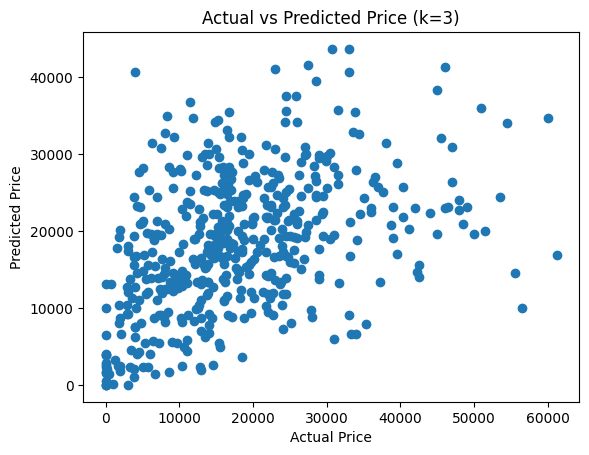

k=10, Sum of Squared Error: 55401092793.409996


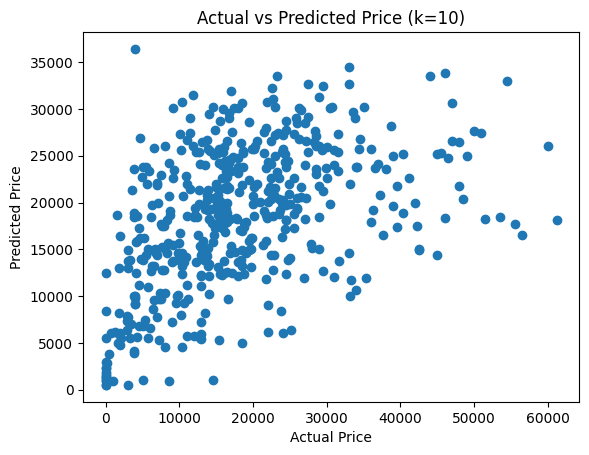

k=25, Sum of Squared Error: 51585228924.304


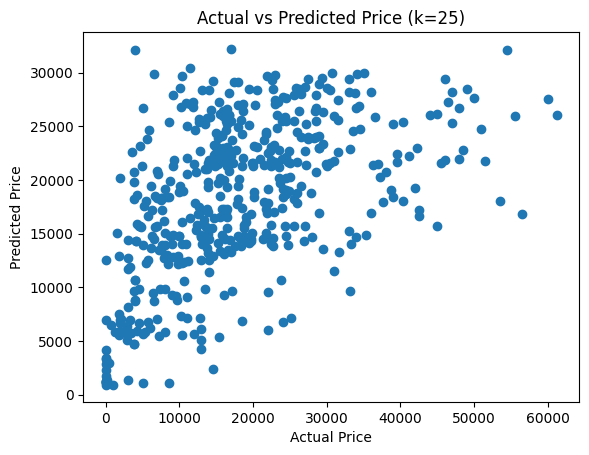

k=50, Sum of Squared Error: 49847721982.09799


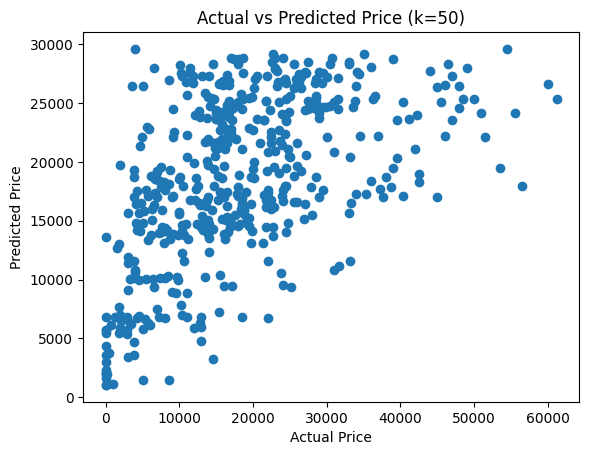

k=100, Sum of Squared Error: 49135529480.4603


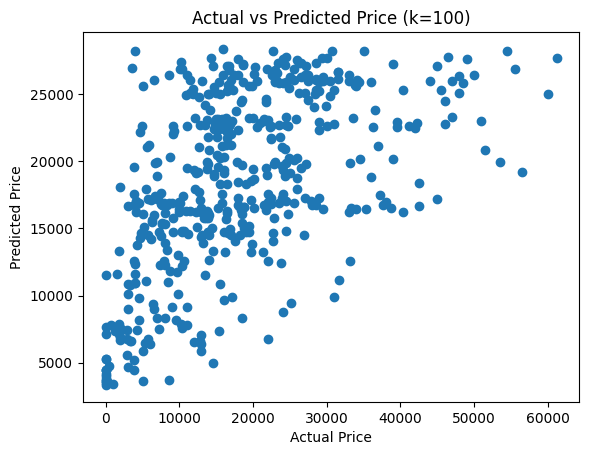

k=300, Sum of Squared Error: 50238649457.106


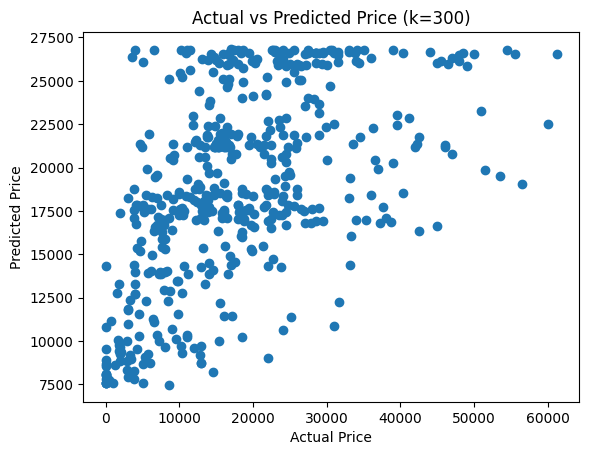

In [8]:
#4. Use the  𝑘 NN algorithm and the training data to predict price using year and mileage for the test set for  𝑘=3,10,25,50,100,300 . For each value of  𝑘 , compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase  𝑘 ?
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_values = [3, 10, 25, 50, 100, 300]
for k in k_values:
  knn_model = KNeighborsRegressor(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  sse = np.sum((y_test - y_pred)**2)
  print(f"k={k}, Sum of Squared Error: {sse}")
  plt.figure()
  plt.scatter(y_test, y_pred)
  plt.xlabel("Actual Price")
  plt.ylabel("Predicted Price")
  plt.title(f"Actual vs Predicted Price (k={k})")
  plt.show()


77


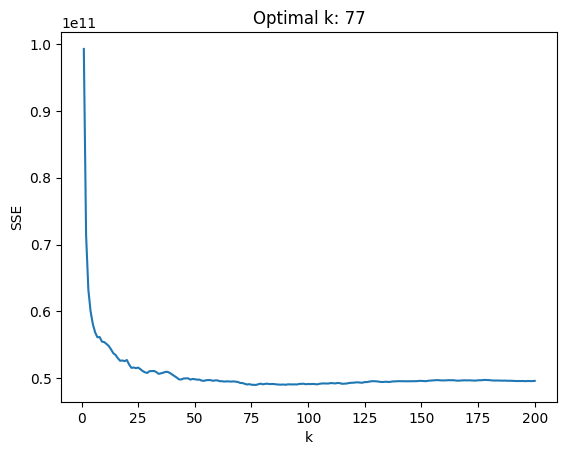

In [9]:
#5. Determine the optimal  𝑘  for these data.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
k_bar = 200
k_grid = np.arange(1, k_bar + 1)
SSE = np.zeros(k_bar)

SSE = np.array([
    np.sum((y_test - KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train).predict(X_test)) ** 2)
    for k in k_grid
])

SSE_min = np.min(SSE)
k_star = k_grid[np.argmin(SSE)]

print(k_star)
plt.plot(k_grid, SSE)
plt.xlabel("k")
plt.title(f"Optimal k: {k_star}")
plt.ylabel('SSE')
plt.show()

In [13]:
#6. Describe what happened in the plots of predicted versus actual prices as  𝑘  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

print('For smaller values of k, the model displays underfitting. These are far off from the actual prices and did not capture the trends in the data. As k increases the models predictions improve but after a certain point it leads to overfitting.')

For smaller values of k, the model displays underfitting. These are far off from the actual prices and did not capture the trends in the data. As k increases the models predictions improve but after a certain point it leads to overfitting.


**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [16]:
#1. Load the ./data/heart_failure_clinical_records_dataset.csv. Are there any NA's to handle? use .drop() to remove time from the dataframe.
import pandas as pd
import numpy as np
df = pd.read_csv('./knn/data/heart_failure_clinical_records_dataset.csv')
df = df.drop('time', axis=1)
print(df.shape)
df.describe()

(299, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [17]:
#2. Make a correlation matrix. What variables are strongly associated with a death event?

df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [22]:
#3. For the dummy variables anaemia, diabetes, high_blood_pressure, sex, and smoking, compute a summary table of DEATH_EVENT grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?

columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
for column in columns:
    print(df.loc[:,[column,'DEATH_EVENT']].groupby(column).describe())


        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

Anaemia and high blood presure are the strongest predictors when we look at the mean values.

In [25]:
#4. On the basis of your answers from 2 and 3, build a matrix  𝑋  of the variables you think are most predictive of a death, and a variable  𝑦  equal to DEATH_EVENT.

columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
y = df['DEATH_EVENT']
x = df.loc[:,columns]

In [26]:
#5. Maxmin normalize all of the variables in X.
for column in x.columns:
  x[column] = (x[column] - x[column].min()) / (x[column].max() - x[column].min())


In [28]:
#6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).


np.random.seed(100)
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) )
test = [item for item in all if item not in train]

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

20


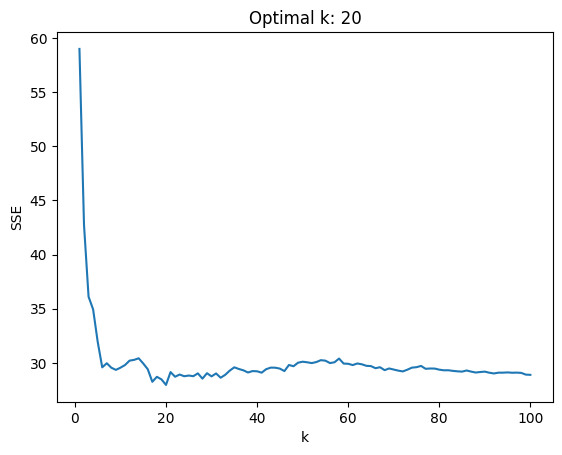

In [30]:
k_bar = 100
k_grid = np.arange(1, k_bar + 1)
SSE = np.zeros(k_bar)

SSE = np.array([
    np.sum((y_test - KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train).predict(X_test)) ** 2)
    for k in k_grid
])

SSE_min = np.min(SSE)
k_star = k_grid[np.argmin(SSE)]

print(k_star)
plt.plot(k_grid, SSE)
plt.xlabel("k")
plt.title(f"Optimal k: {k_star}")
plt.ylabel('SSE')
plt.show()


[83]


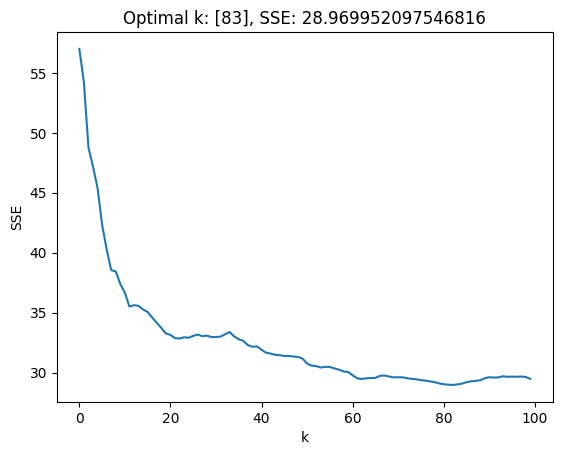

In [33]:
X = df.drop('DEATH_EVENT', axis=1)
X_train = X.iloc[train, :]
y_train = y.iloc[train]
X_test = X.iloc[test, :]
y_test = y.iloc[test]

from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

max_k = 100
k_values = np.arange(1, max_k)
SSE = np.zeros(max_k)

for k in range(max_k):
    knn_model = KNeighborsRegressor(n_neighbors=k + 1)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    SSE[k] = np.sum((y_test - y_pred) ** 2)

min_SSE = np.min(SSE)
optimal_k_index = np.where(SSE == min_SSE)[0]
optimal_k = k_values[optimal_k_index]
print(optimal_k)
plt.plot(np.arange(0, max_k), SSE)
plt.xlabel("k")
plt.title(f"Optimal k: {optimal_k}, SSE: {min_SSE}")
plt.ylabel('SSE')
plt.show()

As we increase variables, the higher optimal k is chosen because it has a higher SSE. But the model with the least variables did a better job for it's predictions.